# **Cheminformatics in Python: Predicting Solubility of Molecules**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh

--2022-03-08 01:39:49--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   202MB/s    in 0.4s    

2022-03-08 01:39:49 (202 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]



In [2]:
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh

In [3]:
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - conda==4.8.2=py37_0
    - cryptography==2.8=py37h1ba5d50_0
    - idna==2.8=py37_0
    - ld_impl_linux-64==2.33.1=h53a641e_7
    - libedit==3.1.20181209=hc058e9b_0
    - libffi==3.2.1=hd88cf55_4
    - libgcc-ng==9.1.0=hdf63c60_0
    - libstdcxx-ng==9.1.0=hdf63c60_0
    - ncurses==6.2=he6710b0_0
    - openssl==1.1.1d=h7b6447c_4
    - pip==20.0.2=py37_1
    - pycosat==0.6.3=py37h7b6447c_0
    - pycparser==2.19=py37_0
    - pyopenssl==19.1.0=py37_0
    - pysocks==1.7.1=py37_0
    - python==3.7.6=h0371630_2
    - readline==7.0=h7b6447c_5
    - requests==2.22.0=py37_1
    - ruamel_yaml==0.15.8

In [4]:
! conda install -c rdkit rdkit -y

Solving environment: \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            1_gnu          22 KB
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.3.2           |   py37heb32a55_1         125 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2022.2.1   |       h06a4308_0         122 KB
    cairo-1.16.0               |       hf32fb01_1         1.0 MB
    certifi-2021.10.8          |   py37h06a4308_2         151 KB
    conda-4.11.0               |   py37h06a4308_0        14.4 MB
    fontconfig-2.13.1          |       h6c09931_0         250 KB
    freetype-2.11.0            |       h70c0345_0         618 KB
    giflib-5.2.1               |

In [6]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [7]:
! wget https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt

--2022-03-08 01:43:21--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Resolving pubs.acs.org (pubs.acs.org)... 104.18.0.20, 104.18.1.20
Connecting to pubs.acs.org (pubs.acs.org)|104.18.0.20|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1 [following]
--2022-03-08 01:43:21--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt [following]
--2022-03-08 01:43:21--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 60034 (59K

In [8]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2022-03-08 01:43:41--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: ‘delaney.csv’

delaney.csv         100%[===================>]  57.51K  --.-KB/s    in 0.01s   

2022-03-08 01:43:41 (3.85 MB/s) - ‘delaney.csv’ saved [58889/58889]



In [9]:
import pandas as pd
df=pd.read_csv("/content/delaney.csv")

In [10]:
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [12]:
df["SMILES"]

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [14]:
from rdkit import Chem
m=Chem.MolFromSmiles(df.SMILES[0])
print(m)

In [15]:
m.GetNumAtoms()

6

# Calculate molecular descriptors in rdkit

In [19]:
mol_list=[]
for element in df.SMILES:
  mol=Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [21]:
len(mol_list)

1144

To predict LogS (log of the aqueous solubility), the study by [Delaney](https://pubs.acs.org/doi/10.1021/ci034243x) makes use of 4 molecular descriptors:

cLogP (Octanol-water partition coefficient)
MW (Molecular weight)
RB (Number of rotatable bonds)

AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)

In [22]:
import numpy as np

In [23]:
from rdkit.Chem import Descriptors

In [66]:
MolLogP=[]
MolWt=[]
NumRotateBond=[]
def generate(smiles, mol_list):
  for mol in mol_list:
    desc_MolLogP=Descriptors.MolLogP(mol)
    desc_MolWt=Descriptors.MolWt(mol)
    desc_NumRotateBond=Descriptors.NumRotatableBonds(mol)
    MolLogP.append(desc_MolLogP)
    MolWt.append(desc_MolWt)
    NumRotateBond.append(desc_NumRotateBond)
  #data=pd.DataFrame({
  #  "MolLogP":MolLogP,
  #  "MolWt":MolWt,
  #  "NumRotatableBond":NumRotateBond
  #})
  #return data

In [67]:
data=generate(df.SMILES, mol_list)

In [ ]:
data

In [36]:
#Aromatic Proportion
m = Chem.MolFromSmiles('Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O')
m.GetNumAtoms()

23

In [ ]:
for i in range(m.GetNumAtoms()):
  print(m.GetAtomWithIdx(i).GetIsAromatic())

In [39]:
#Heavy Atoms
m = Chem.MolFromSmiles('Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O')
Descriptors.HeavyAtomCount(m)

23

In [53]:
def AromaticAtoms(m):
  aromatic_atoms=[]
  aa_count=0
  for i in range(m.GetNumAtoms()):
    aromatic_atoms.append(m.GetAtomWithIdx(i).GetIsAromatic())
  for i in aromatic_atoms:
    if i==True:
      aa_count=aa_count+1
  return aa_count

In [61]:
def HeavyAtom(m):
  return Descriptors.HeavyAtomCount(m)

In [62]:
desc_aromatic_atoms=[]
for i in mol_list:
  a=AromaticAtoms(i)/HeavyAtom(i)
  desc_aromatic_atoms.append(a)
desc_aromatic_atoms

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334,
 0.5,
 0.0,
 0.8333333333333334,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.8571428571428571,
 0.9090909090909091,
 0.9333333333333333,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.7692307692307693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [75]:
X=pd.DataFrame({
    "MolLogP":MolLogP,
    "MolWt":MolWt,
    "NumRotatableBond":NumRotateBond,
    "AromaticProportion":desc_aromatic_atoms
    })

In [76]:
X

,MolLogP,MolWt,NumRotatableBond,AromaticProportion
0,2.59540,167.850,0,0.000000
1,2.37650,133.405,0,0.000000
2,2.59380,167.850,1,0.000000
3,2.02890,133.405,1,0.000000
4,2.91890,187.375,1,0.000000
...,...,...,...,...
1139,1.98820,287.343,8,0.000000
1140,3.42130,286.114,2,0.333333
1141,3.60960,308.333,4,0.695652
1142,2.56214,354.815,3,0.521739


In [77]:
Y=df.iloc[:,1]

In [78]:
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2) 

In [121]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [122]:
Y_pred_train = model.predict(X_train)

In [123]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, Y_pred_train))

Coefficients: [-0.7344306  -0.0064952  -0.00507923 -0.47749966]
Intercept: 0.2618989451196545
Mean squared error (MSE): 0.98
Coefficient of determination (R^2): 0.77


In [124]:
Y_pred_test = model.predict(X_test)

In [125]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, Y_pred_test))

Coefficients: [-0.7344306  -0.0064952  -0.00507923 -0.47749966]
Intercept: 0.2618989451196545
Mean squared error (MSE): 1.15
Coefficient of determination (R^2): 0.76


In [126]:
yintercept = model.intercept_
LogP = str(model.coef_[0])+' LogP'
MW = str(model.coef_[1])+' MW'
RB = str(model.coef_[2])+' RB'
AP = str(model.coef_[3])+' AP'

In [127]:
print('LogS = ',
      '' ,
      yintercept, 
      '' ,
      LogP ,
      '' ,
      MW ,
      '' , 
      RB ,
      '' , 
      AP)

LogS =   0.2618989451196545  -0.7344305993857714 LogP  -0.006495195031111196 MW  -0.005079234001908325 RB  -0.4774996608981071 AP


# Training on entire dataset

In [128]:
model=linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [131]:
full_preddiction=model.predict(X)

In [132]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, full_preddiction))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, full_preddiction))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997185
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [133]:
fyintercept = model.intercept_
fLogP = str(model.coef_[0])+' LogP'
fMW = str(model.coef_[1])+' MW'
fRB = str(model.coef_[2])+' RB'
fAP = str(model.coef_[3])+' AP'

In [134]:
print('LogS = ',
      '' ,
      fyintercept, 
      '' ,
      fLogP ,
      '' ,
      fMW ,
      '' , 
      fRB ,
      '' , 
      fAP)

LogS =   0.2565006830997185  -0.7417360905910635 LogP  -0.00659926842079894 MW  0.0032005100261398773 RB  -0.4231638660265008 AP


In [135]:
import matplotlib.pyplot as plt

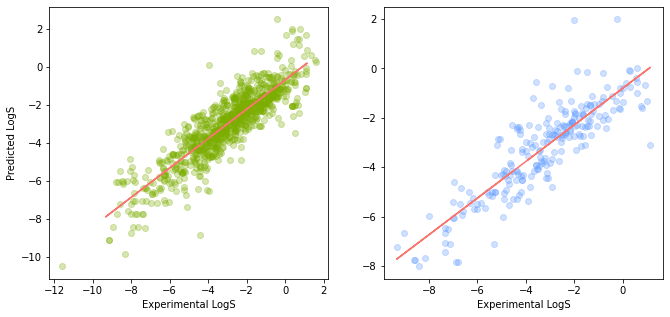

In [136]:
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.xlabel('Experimental LogS')

plt.savefig('plot_horizontal_logS.png')
plt.savefig('plot_horizontal_logS.pdf')
plt.show()

# Reference


John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure. J. Chem. Inf. Comput. Sci. 2004, 44, 3, 1000-1005.
](https://pubs.acs.org/doi/10.1021/ci034243x)


[Pat Walters. Predicting Aqueous Solubility - It's Harder Than It Looks. Practical Cheminformatics Blog
](https://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html)


Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More, O'Reilly, 2019.

Supplementary file from Delaney's [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.](https://pubs.acs.org/doi/10.1021/ci034243x)

https://www.youtube.com/watch?v=PxkKVKxEZCM